In [1]:
#remmeber to make it as complex as possible.

In [1]:
#importing the dataset:
#@title Run this to download your data! { display-mode: "form" }
# Load the data!
import gdown # if you want to use files from google drive
import pandas as pd
from sklearn import metrics

# gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);

from google.cloud import storage
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv','cancer_data.csv')

data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

Downloaded public blob Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv from bucket inspirit-ai-data-bucket-1 to cancer_data.csv.


In [2]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
from sklearn.metrics import accuracy_score   # Great for creating quick ML models


In [3]:
data_path  = 'cancer_data.csv' # csv is a string. 

# Use the 'pd.read_csv('file')' function to read in read our data and store it in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']] # loading all of the data from the csv file on adding this to the data frame variable. 
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [4]:
# YOUR CODE HERE: 
dataframe.head() # dataframe is the new variable that we have, and a head() method doesnt work on data_path since it is a csv file meaning it doesnt work with strings. 
#1 means it is malignant cell 
#.head()- for the first few data points 
#.tail()- for the last few data points
#no calculations werent done because the data was already imported and presented in the csv file. 
# END CODE

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [6]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


In [7]:
#Visualization of Dataset begins: 
#First, we'll import some handy data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt 

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


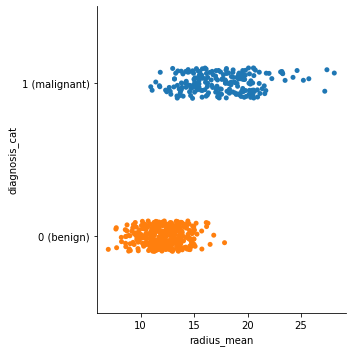

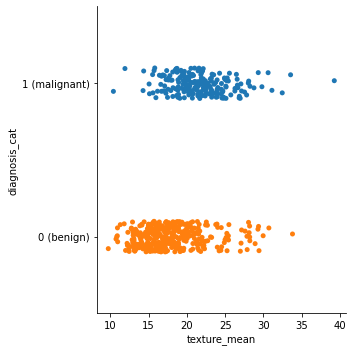

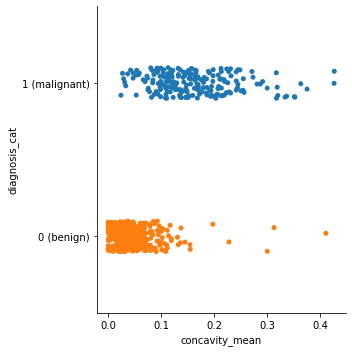

In [8]:

#radius_mean
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

#texture_mean
sns.catplot(x = 'texture_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

#concavity_mean
sns.catplot(x = 'concavity_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

#perimeter

dataframe.head()



#try and make a new graph, see how other variables like concavity affect the diagnosis. 

In [9]:
#PREDICTTING DIAGNOSIS STARTS NOW.

InvalidIndexError: (slice(None, None, None), None)

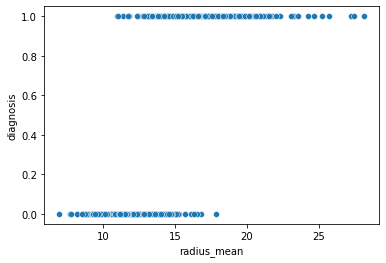

In [9]:
#Simple Linear Regression Model:
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

In [ ]:
#SIMPLE BOUNDARY CLASSIFIER

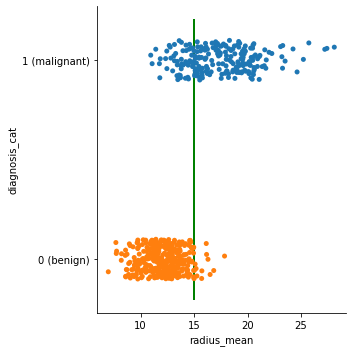

In [10]:
boundary = 15 # change me!

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

In [11]:
#BUILDING THE BOUNDARY
def boundary_classifier(target_boundary, radius_mean_series):
  

  result = [] #fill this in with predictions!

  #loop through radius mean series, compare each value to target boundary, bigger than malignant then it malignant (malignant is 1 and benign is 0), add this one to the result list
  # YOUR CODE HERE




  for x in radius_mean_series:
    if x >= target_boundary:
      result.append(1)

    else:
      result.append(0)

  return result



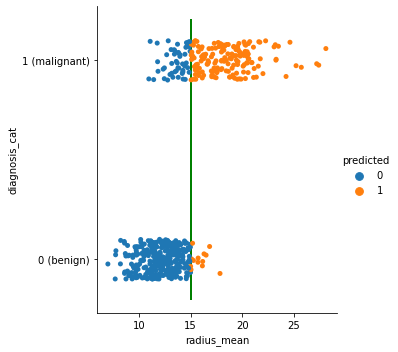

In [12]:
#Below code will choose a boundary and run the classifier as well. 
chosen_boundary = 15 #Try changing this!

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

In [13]:
#comparing the actual literature value and the predicted value for y (malignant or benign)
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [14]:
#accuracy of approach 2
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8875219683655536


In [ ]:
#APPROACH 3: LOGISTIC REGRESSION

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [16]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [17]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


In [18]:
#Single Variable Logistic regression 
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [19]:
# Here, we create a 'reg' object that handles the line fitting for us!
logreg_model = linear_model.LogisticRegression()
# note: this model hasn't been trained yet. 

In [20]:
#Next, we want to tell our 'logreg_model' object to take in our inputs (X) and our true labels (y) and fit a line that predicts y from X.

#Exercise: Can you place the arguments X_train and y_train correctly into this function to do this?

#logreg_model.fit(FILL_ME_IN, FILL_ME_IN)

### YOUR CODE HERE
logreg_model.fit(X_train, y_train)
### END CODE

LogisticRegression()

In [21]:
#Testing the model:
X_test = test_df[X]
y_test = test_df[y]

In [22]:
#making predictions using our test set.
## YOUR CODE HERE
y_pred = logreg_model.predict(X_test) #doing y_test would mean giving 0s and 1s to the function as an input and hence won't make sense. 
## END CODE

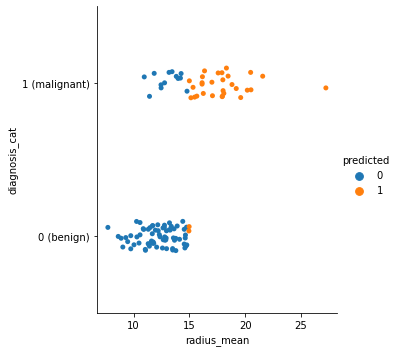

In [23]:
#Visualizing the results:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [24]:
#Evaluating the accuracy of the logistic regression model: 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

#to improve accuracy of the results, you could use other input columns such as concavity. You could also combine multiple of the input values to give a better accuracy.
#HOMEWORK- use multiple inputs as a means of improving the accuracy. 

0.868421052631579


In [25]:
#another method of calculating accuracy: use the k cross validation method and once you get a range of 
#accuacies then, plot it using Vatsal's code. 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
skfold = StratifiedKFold(n_splits=3, random_state= None)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, x1, y1, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [26]:
# cross_validation replace cross_validation with model_selection
# redoing the code for the above cell. 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import KFold   #For K-fold cross validation
skfold = StratifiedKFold(n_splits=3, random_state= None)
model_skfold = LogisticRegression()
results_skfold = cross_validation.cross_val_score(model_skfold, x1, y1, cv=skfold)

print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

NameError: name 'cross_validation' is not defined

<AxesSubplot:xlabel='radius_mean', ylabel='Predicted Probability'>

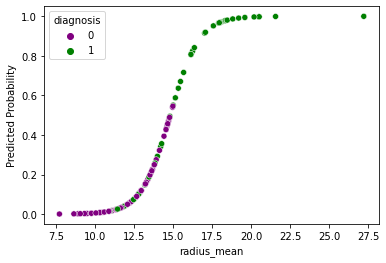

In [27]:
# Plotting the 'soft probablities' of the logistic regression model:
#@title Run this to plot logistic regression's soft probabilities { display-mode: "form" }

# Let's visualize the probabilities for `X_test`
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

In [ ]:
#APPROACH 4: Multiple Feature Logistic regression

In [28]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


In [29]:
#Experimenting with Single-Variable Logistic regression
X = ['radius_mean'] #Try changing this later!
y = 'diagnosis'

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:

# 3. Initialize the model object

# 4. Fit the model to the training data

# 5. Use this trained model to predict on the test data

# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.
#NEED TO PRINT THE ACCURACY.

In [30]:
#Logistic regression with Multiple features:
multi_X = ['radius_mean']
y = 'diagnosis'

# 1. Split data into train and test
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:

# 3. Initialize the model object

# 4. Fit the model to the training data

# 5. Use this trained model to predict on the test data

# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.
#NEED TO PRINT THE ACCURACY

Text(0.5, 257.44, 'Predicted diagnosis')

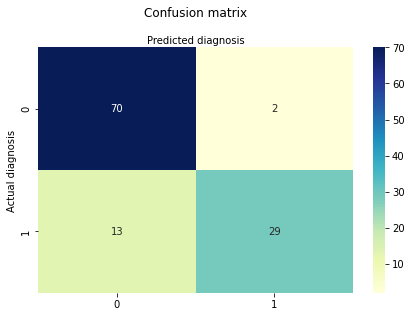

In [28]:
# CONFUSION MATRICES
#@title Run this code to create a confusion matrix. { display-mode: "form" }
#@markdown If you are curious how it works you may double-click to inspect the code.

# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [31]:
#EXTENSION: CHOOSING A METRIC
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

NameError: name 'cnf_matrix' is not defined

In [ ]:
#need to calculate the accuracy of this model. 

In [ ]:
#DECISION TREE WALKTHROUGH

In [32]:
#@title Create the model { display-mode: "both" }
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=3)

# We use our previous `X_train` and `y_train` sets to build the model
class_dt.fit(multi_X_train, y_train) # error showing that multi_X_train is not defined-FIX THIS.

NameError: name 'multi_X_train' is not defined

In [33]:
#@title Visualize and interpret the tree
tree.plot_tree(class_dt) 

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
#@title Find the predictions based on the model { display-mode: "both" }
# now let's see how it performed!
multi_y_pred = class_dt.predict(multi_X_test)

NameError: name 'multi_X_test' is not defined

In [35]:
#@title Calculate model performance { display-mode: "both" }
print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
print("Recall: ", metrics.recall_score(y_test, multi_y_pred))

NameError: name 'multi_y_pred' is not defined

In [36]:
#ADVANCED (optional): CHOOSING A CLASSIFIER
#@title Run this to import classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [37]:
#Once you've got your code working, try changing the hyperparameters of the classifiers
#to see if you can get even better results. 
#Can you find out what the hyperparameters mean?
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] 


#Use a for loop to train and test each classifier, and print the results
#You might find the code above useful, as well as https://towardsdatascience.com/a-python-beginners-look-at-loc-part-2-bddef7dfa7f2 .

### YOUR CODE HERE ###




### END CODE ###

#TODO: Using pyplot, show the relationships between precision, recall, and/or accuracy.
#Tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html


In [ ]:
#KNN Classifier

TypeError: Image data of dtype object cannot be converted to float

<Figure size 432x288 with 0 Axes>

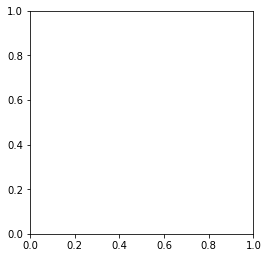

In [38]:
import matplotlib.pyplot as plt 
from sklearn import datasets, neighbors
data_path = 'cancer_data.csv'
datafraome = pd.read_csv(data_path)
dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']] # loading all of the data from the csv file on adding this to the data frame variable. 
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

#some more visualization:
plt.gray()
plt.matshow(dataframe)